In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import copy as cp

Define path to resource files

In [2]:
resources_folder = "Resources"
city_data_file = os.path.join(resources_folder,"city_data.csv")
ride_data_file = os.path.join(resources_folder,"ride_data.csv")

Read the city_data_file into city_df dataframe

In [3]:
city_df = pd.read_csv(city_data_file)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


Read ride_data_file into ride_df dataframe

In [4]:
ride_df = pd.read_csv(ride_data_file)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


Merge **ride_df** with **city_df** on "city" into **city_ride_df**

In [5]:
city_ride_df = pd.merge(ride_df, city_df, on=["city"])
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


## Technical Analysis Deliverable 1: A Summary DataFrame

### Get the total rides by city type

In [6]:
# Rides = Fares
total_rides_per_city_type = city_ride_df.groupby(["type"]).count()  
total_rides_per_city_type = total_rides_per_city_type.reset_index(drop=True)["fare"]
total_rides_per_city_type

0     125
1     625
2    1625
Name: fare, dtype: int64

### Get total drivers by city type

In [7]:
total_drivers_per_city_type = city_df.groupby(["type"]).sum()
total_drivers_per_city_type = total_drivers_per_city_type.reset_index(drop=True)["driver_count"]
total_drivers_per_city_type 

0      78
1     490
2    2405
Name: driver_count, dtype: int64

### Get total fares by city type

In [8]:
total_fares_per_city_type = city_ride_df.groupby(["type"]).sum()
total_fares_per_city_type = total_fares_per_city_type.reset_index(drop=True)["fare"]
total_fares_per_city_type

0     4327.93
1    19356.33
2    39854.38
Name: fare, dtype: float64

### Get Average fare per ride by city type

In [9]:
# Average fare per ride per city type = total fares per city type / total fares (rides) per city type
average_fare_per_ride = total_fares_per_city_type / total_rides_per_city_type
average_fare_per_ride

0    34.623440
1    30.970128
2    24.525772
Name: fare, dtype: float64

### Get Average fare per driver by city type

In [10]:
average_fare_per_driver = total_fares_per_city_type / total_drivers_per_city_type
average_fare_per_driver

0    55.486282
1    39.502714
2    16.571468
dtype: float64

### Display the Summary Dataframe

In [11]:
final_summary = pd.DataFrame({"Total Rides":total_rides_per_city_type,\
                              "Total Drivers":total_drivers_per_city_type,\
                              "Total Fares":total_fares_per_city_type,\
                              "Average Fare per Ride":average_fare_per_ride, \
                              "Average Fare per Driver": average_fare_per_driver})

int_cols = ["Total Rides","Total Drivers"]
for col in int_cols:
    final_summary[col] = final_summary[col].map("{:,}".format)

mon_cols = ["Total Fares","Average Fare per Ride","Average Fare per Driver"]
for col in mon_cols:
    final_summary[col] = final_summary[col].map("${:,.2f}".format)
    
final_summary["type"] = ["Rural","Suburban","Urban"]
final_summary.set_index(["type"],inplace=True)
final_summary.index.name = None
final_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2: 
## Multiple-Line Plot for the Sum of the Fares for Each City Type

In [12]:
%matplotlib inline

In [13]:
city_ride_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [14]:
city_ride_df = city_ride_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id',\
                             'driver_count': 'No. Drivers', 'type':'City Type'})
city_ride_df.set_index(city_ride_df["Date"],inplace=True)
city_type_fare_df = cp.copy(city_ride_df[["City Type","Fare"]])
city_type_fare_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-04-07 20:51:11,Urban,31.25
2019-03-09 23:45:55,Urban,19.89
2019-04-07 18:09:21,Urban,24.28
2019-01-02 14:14:50,Urban,13.89
...,...,...
2019-04-18 19:33:12,Rural,46.60
2019-03-02 21:04:10,Rural,20.99
2019-03-06 20:06:51,Rural,48.11


Set the index to the datetime data type

In [15]:
city_type_fare_df.index = pd.DatetimeIndex(city_type_fare_df.index)

In [16]:
city_type_fare_df.groupby("City Type").sum()

,Fare
City Type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [17]:
city_type_fare_df.reset_index(inplace=True)
city_type_fare_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-04-07 20:51:11,Urban,31.25
2,2019-03-09 23:45:55,Urban,19.89
3,2019-04-07 18:09:21,Urban,24.28
4,2019-01-02 14:14:50,Urban,13.89
...,...,...,...
2370,2019-04-18 19:33:12,Rural,46.60
2371,2019-03-02 21:04:10,Rural,20.99
2372,2019-03-06 20:06:51,Rural,48.11
2373,2019-02-02 06:28:04,Rural,53.07


Create a pivot table DataFrame with the Date as the index and columns = 'City Type'. The Fare for each Date should appear in each row

In [18]:
city_type_fare_df = city_type_fare_df.pivot_table(values='Fare',index="Date",columns="City Type")

In [19]:
city_type_fare_df_slice = cp.copy(city_type_fare_df).loc['2019-01-01':'2019-04-28']

In [20]:
city_type_fare_df_slice

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, and calculate the sum() of the fares for each week in the resampled data.

In [21]:
resampled_df = city_type_fare_df_slice.resample('W').sum()

In [22]:
resampled_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


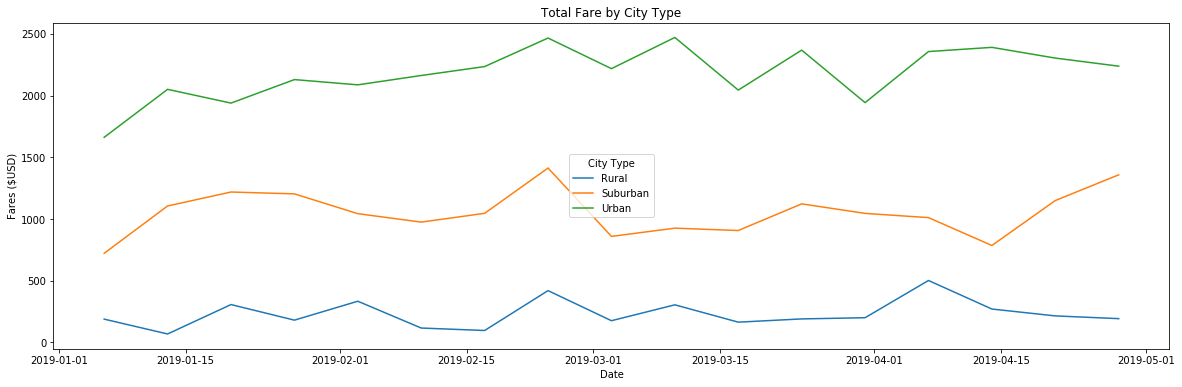

In [59]:
figure,ax = plt.subplots(figsize=(20,6))


ax.plot(resampled_df)
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fares ($USD)")
ax.set_xlabel("Date")

ax.legend(resampled_df.columns,title="City Type",loc="center")
